In [1]:
import pandas as pd
import os
from fuzzywuzzy import fuzz

In [2]:
def drop_unnamed_cols(df):
    
    unnamed_cols = [col for col in df.columns
                   if col.startswith('Unnamed:')]
    
    df.drop(unnamed_cols, axis=1, inplace=True)

In [3]:
def read_data(sheetname, file = 'producao.xlsx', 
              path = 'original_data/consulta_publica/'):
    
    fpath = os.path.join(path, file)
    
    df = pd.read_excel(fpath, sheet_name = sheetname)
    drop_unnamed_cols(df)
    
    return df

In [4]:
df_origi = read_data('acoes', file= 'dados_extraidos_agenda_2030.xlsx', path='generated_data')

In [5]:
df_origi.head()

,letra_acao,desc_acao,orgao_resp,marco,meta_numero,desc_meta
0,A,Ampliar a Permanência Escolar dos estudantes,SME,"Permanência escolar dos estudantes ampliada, a...",4.1,"Até 2030, garantir que todas as meninas e meni..."
1,B,Elaborar e aplicar a Provinha e a Prova São Pa...,SME,Prova aplicada,4.1,"Até 2030, garantir que todas as meninas e meni..."
2,C,Divulgar os resultados e análises referentes a...,SME,Resultados e análises divulgados,4.1,"Até 2030, garantir que todas as meninas e meni..."
3,D,Celebrar parceria com Universidades para aperf...,SME,Parceria celebrada,4.1,"Até 2030, garantir que todas as meninas e meni..."
4,E,Implementar a Teoria de Resposta ao Item (TRI)...,SME,Teoria implementada,4.1,"Até 2030, garantir que todas as meninas e meni..."


In [6]:
def clean_txt(item):
    
    if pd.isnull(item):
        return None
    
    item = str(item)
    item = item.lower()
    item = item.strip()
    
    return item

In [7]:
df_atual = read_data('Ações_propostas')

In [8]:
df_atual['descricao_match'] = ''
df_atual['marco'] = ''
df_atual['fuzzy_match_ratio'] = 0

In [9]:
df_atual = df_atual.sort_values(by='Descrição da Ação\n(TEXTO A SER VALIDADO)')
df_origi = df_origi.sort_values(by='desc_acao')

In [10]:
for i, row in df_atual.iterrows():
    
    desc_atual = row['Descrição da Ação\n(TEXTO A SER VALIDADO)']
    ratios = {}
    for j, row_antiga in df_origi.iterrows():
        
        desc_antiga = row_antiga['desc_acao']
        
        ratio = fuzz.ratio(desc_atual, desc_antiga)
        ratios[j] = ratio
    
    largest_ratio = ratios[0]
    indice = 0
    for j, ratio in ratios.items():
        if ratio > largest_ratio:
            largest_ratio = ratio
            indice = j
            
    df_atual.loc[i, 'descricao_match'] = df_origi.loc[indice, 'desc_acao']
    df_atual.loc[i, 'marco'] = df_origi.loc[indice, 'marco']
    df_atual.loc[i, 'fuzzy_match_ratio'] = ratios[indice]

In [11]:
df_atual

,ID,Nº Meta,Descrição da Meta Municipal 2030,Letra da Ação,Descrição da Ação\n(TEXTO A SER VALIDADO),Órgão Responsável,descricao_match,marco,fuzzy_match_ratio
622,636,15.1,"Até 2030, assegurar a conservação, recuperação...",15.1-F,Abrir em tempo integral as Unidades de Conserv...,SVMA,Abrir em tempo integral as Unidades de Conserv...,"Até 2021, PNM Fazenda do Carmo; até 2023 demai...",100
292,296,8.1,Sustentar o crescimento econômico do produto i...,8.1-B,"Acelerar 192 negócios inovadores (48 por ano),...",SMDET,"Acelerar 192 negócios inovadores (48 por ano),...",Número de negócios inovadores acelerados,100
47,48,4.6,"Até 2030, garantir que todos os jovens sem exc...",4.6-B,Acompanhar a permanência escolar e realizar Bu...,SME,Acompanhar a permanência escolar e realizar Bu...,Diminuição da evasão na Educação de Jovens e A...,100
46,47,4.6,"Até 2030, garantir que todos os jovens sem exc...",4.6-A,Acompanhar as Aprendizagens na Educação de Jov...,SME,Acompanhar as Aprendizagens na Educação de Jov...,Meios de acompanhamento implementados e result...,100
325,329,10.2,"Até 2030, empoderar e promover a inclusão soci...",10.2-D,Adequar as equipes dos Centros de Cidadania LG...,SMDHC,Adequar as equipes dos Centros de Cidadania LG...,Equipes dos Centros de Cidadania LGBTI e CRD a...,100
...,...,...,...,...,...,...,...,...,...
84,85,4.c,"Até 2030, aumentar substancialmente o continge...",4.c-F,[Mestrado] Acompanhamento do processo seletivo...,SME,[Mestrado] Acompanhamento do processo seletivo...,Processo seletivo finalizado,100
82,83,4.c,"Até 2030, aumentar substancialmente o continge...",4.c-D,[Mestrado] Definição dos equipamentos a serem ...,SME,[Mestrado] Definição dos equipamentos a serem ...,Equipamentos definidos,100
81,82,4.c,"Até 2030, aumentar substancialmente o continge...",4.c-C,[Mestrado] Elaboração de Proposta Pedagógica,SME,[Mestrado] Elaboração de Proposta Pedagógica,Proposta Pedagógica elaborada,100
80,81,4.c,"Até 2030, aumentar substancialmente o continge...",4.c-B,[Mestrado] Elaboração do edital de chamamento ...,SME,[Mestrado] Elaboração do edital de chamamento ...,Edital publicado,100


<AxesSubplot:title={'center':'Fuzzy match - Ações'}, ylabel='Frequency'>

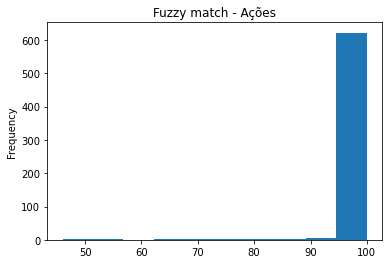

In [12]:
df_atual['fuzzy_match_ratio'].plot.hist(title = 'Fuzzy match - Ações')

In [13]:
df_atual.to_excel('generated_data/acoes_com_marcos.xlsx', index=False)